<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Profissa%CC%83o_Cientista_de_Dados_M30_Pratique_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa - Agrupamento hier√°rquico

Neste exerc√≠cio vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sess√µes de acesso a p√°ginas, cada sess√£o sendo de um √∫nico usu√°rio em um per√≠odo de 12 meses, para posteriormente estudarmos a rela√ß√£o entre o design da p√°gina e o perfil do cliente - "Ser√° que clientes com comportamento de navega√ß√£o diferentes possuem propens√£o a compra diferente?"

Nosso objetivo agora √© agrupar as sess√µes de acesso ao portal considerando o comportamento de acesso e informa√ß√µes da data, como a proximidade a uma data especial, fim de semana e o m√™s.

|Variavel                |Descri√ß√£o          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em p√°ginas administrativas|
|Administrative_Duration | Tempo de acesso em p√°ginas administrativas |
|Informational           | Quantidade de acessos em p√°ginas informativas  |
|Informational_Duration  | Tempo de acesso em p√°ginas informativas  |
|ProductRelated          | Quantidade de acessos em p√°ginas de produtos |
|ProductRelated_Duration | Tempo de acesso em p√°ginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sess√£o  |
|ExitRates               | * Soma de vezes que a p√°gina √© visualizada por √∫ltimo em uma sess√£o dividido pelo total de visualiza√ß√µes |
|PageValues              | * Representa o valor m√©dio de uma p√°gina da Web que um usu√°rio visitou antes de concluir uma transa√ß√£o de com√©rcio eletr√¥nico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das m√£es etc) |
|Month                   | M√™s  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Regi√£o |
|TrafficType             | Tipo de tr√°fego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou n√£o |

\* vari√°vels calculadas pelo google analytics

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install gower
import gower
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/EspecializacÃßaÃÉo em IA/Cientista de Dados - Ebac/Agrupamento e SegmentacÃßaÃÉo de Dados/K-means/ProfissaÃÉo Cientista de Dados M29 - online_shoppers_intention.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## An√°lise descritiva

Fa√ßa uma an√°lise descritiva das vari√°veis do escopo.

- Verifique a distribui√ß√£o dessas vari√°veis
- Veja se h√° valores *missing* e caso haja, decida o que fazer
- Fa√ßa mais algum tratamento nas vari√°veis caso ache pertinente

In [5]:
print("\nValores missing por coluna:\n")
print(df.isnull().sum())


Valores missing por coluna:

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


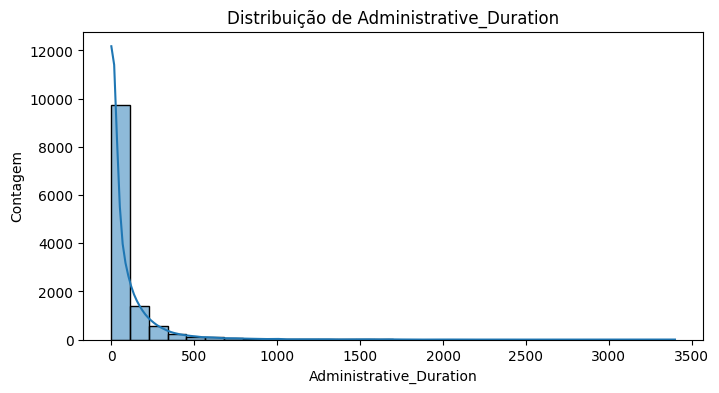

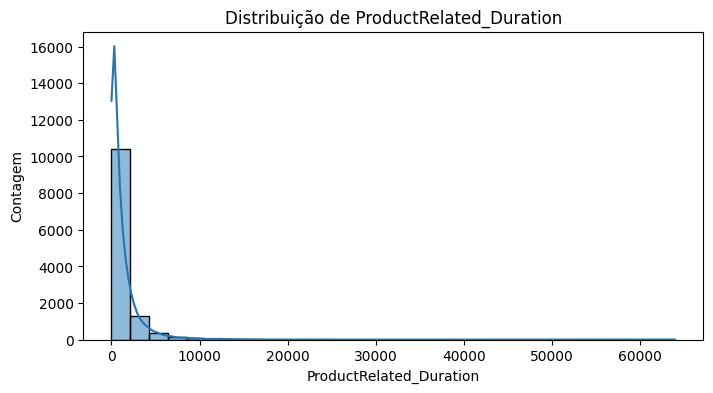

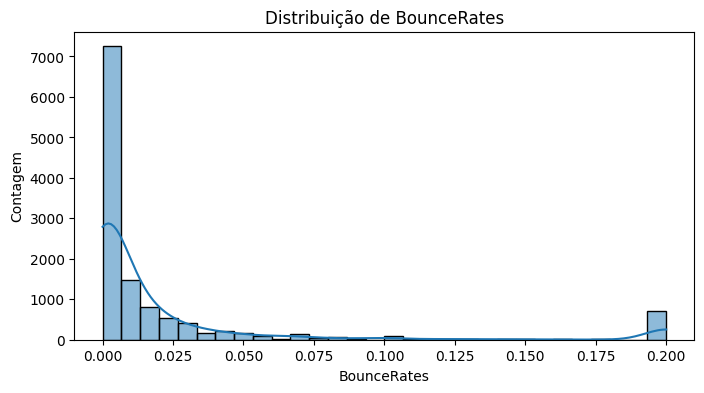

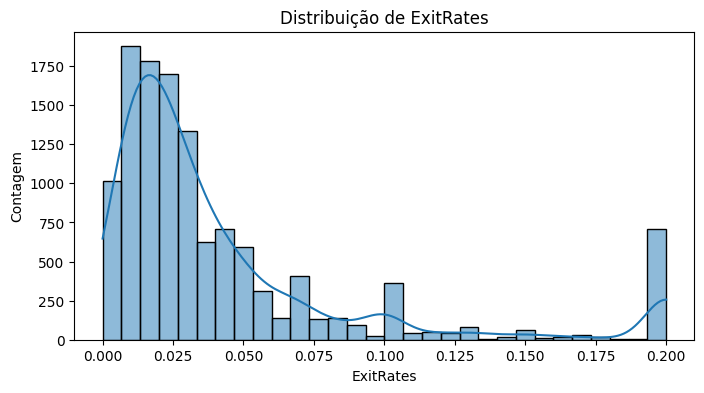

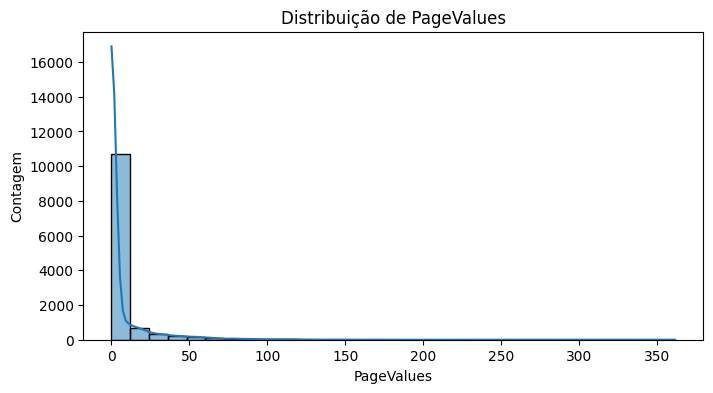

In [6]:
# Distribui√ß√£o de algumas vari√°veis num√©ricas
variaveis_numericas = ['Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

for var in variaveis_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribui√ß√£o de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.show()

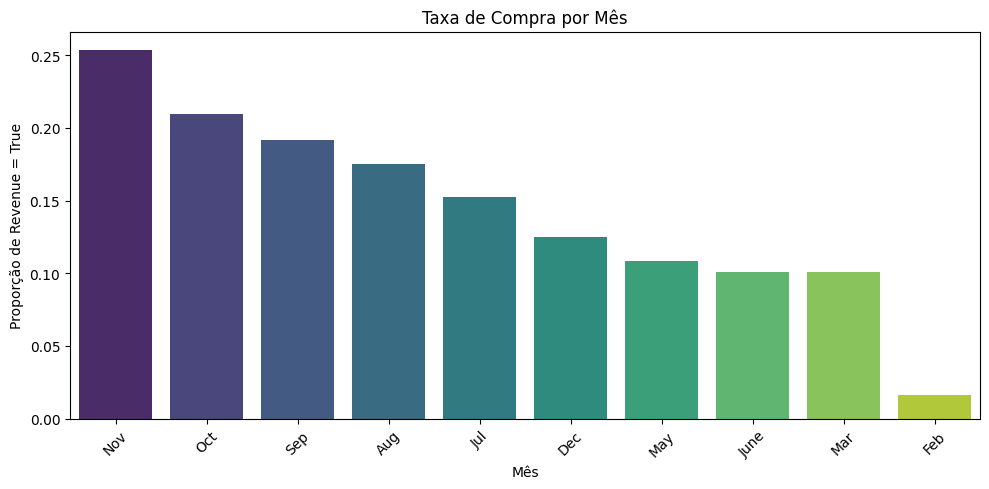

In [7]:
# An√°lise: Taxa de compra por Month

revenue_by_month = df.groupby('Month')[['Revenue']].mean().sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=revenue_by_month.reset_index(), x='Month', y='Revenue', hue='Month', palette='viridis', legend=False)
plt.title('Taxa de Compra por M√™s')
plt.ylabel('Propor√ß√£o de Revenue = True')
plt.xlabel('M√™s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


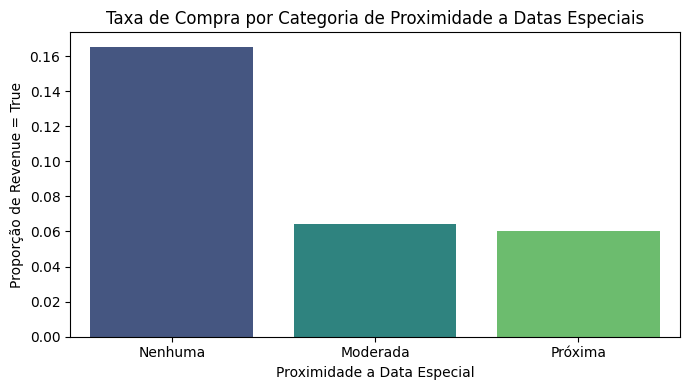

In [8]:
# Agrupar por valor de SpecialDay

df['SpecialDay_cat'] = pd.cut(df['SpecialDay'],
    bins=[-0.01, 0.01, 0.5, 1],
    labels=['Nenhuma', 'Moderada', 'Pr√≥xima'])

specialday_grouped = df.groupby('SpecialDay_cat', observed=False)['Revenue'].mean().reset_index()


plt.figure(figsize=(7,4))
sns.barplot(data=specialday_grouped, x='SpecialDay_cat', y='Revenue', hue='SpecialDay_cat', palette='viridis', legend=False)
plt.title('Taxa de Compra por Categoria de Proximidade a Datas Especiais')
plt.xlabel('Proximidade a Data Especial')
plt.ylabel('Propor√ß√£o de Revenue = True')
plt.tight_layout()
plt.show()


## Vari√°veis de agrupamento

Liste as vari√°veis que voc√™ vai querer utilizar. Essa √© uma atividade importante do projeto, e tipicamente n√£o a recebemos pronta. N√£o h√° resposta pronta ou correta, mas apenas crit√©rios e a sua decis√£o. Os crit√©rios s√£o os seguintes:

- Selecione para o agrupamento vari√°veis que descrevam o padr√£o de navega√ß√£o na sess√£o.
- Selecione vari√°veis que indiquem a caracter√≠stica da data.
- N√£o se esque√ßa de que voc√™ vai precisar realizar um tratamento especial para vari√°veis qualitativas.
- Trate adequadamente valores faltantes.

In [9]:
# Selecionar vari√°veis para agrupamento

variaveis_gower = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay', 'Weekend', 'Month'
]

df_cluster = df[variaveis_gower].copy()

In [10]:
# Tratar vari√°veis qualitativas (categorias)
df_cluster['Weekend'] = df_cluster['Weekend'].astype(str)
df_cluster['Month'] = df_cluster['Month'].astype(str)



In [11]:
# Verificar valores faltantes

missing = df_cluster.isnull().sum()
print("Valores faltantes:\n", missing)

Valores faltantes:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Weekend                    0
Month                      0
dtype: int64


In [17]:
# Resultado final preparado

print("\nTipos de dados prontos para Gower:")
print(df_cluster.dtypes)

# Exibir amostra
df_cluster.head()



Tipos de dados prontos para Gower:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Weekend                     object
Month                       object
dtype: object


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Weekend Month  
0         0.20       0.20         0.0         0.0   False   Feb  
1         0.00       0.10         0.0         0.0   False   Feb  
2         0.20       0.20         0.0         0.0   False   Feb  
3         0.05       0.14         0.0         0.0   False   Feb  
4         0.02       0.05         0.0         0.0    True   Feb

## N√∫mero de grupos

Nesta atividade vamos adotar uma abordagem bem pragm√°tica e avaliar agrupamentos hier√°rquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estrat√©gia do diretor da empresa.

*Aten√ß√£o*: Cuidado se quiser fazer o dendrograma, pois com muitas observa√ß√µes ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

<ipython-input-12-25b880b6a7bd>:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_dist_sample, method='ward'))


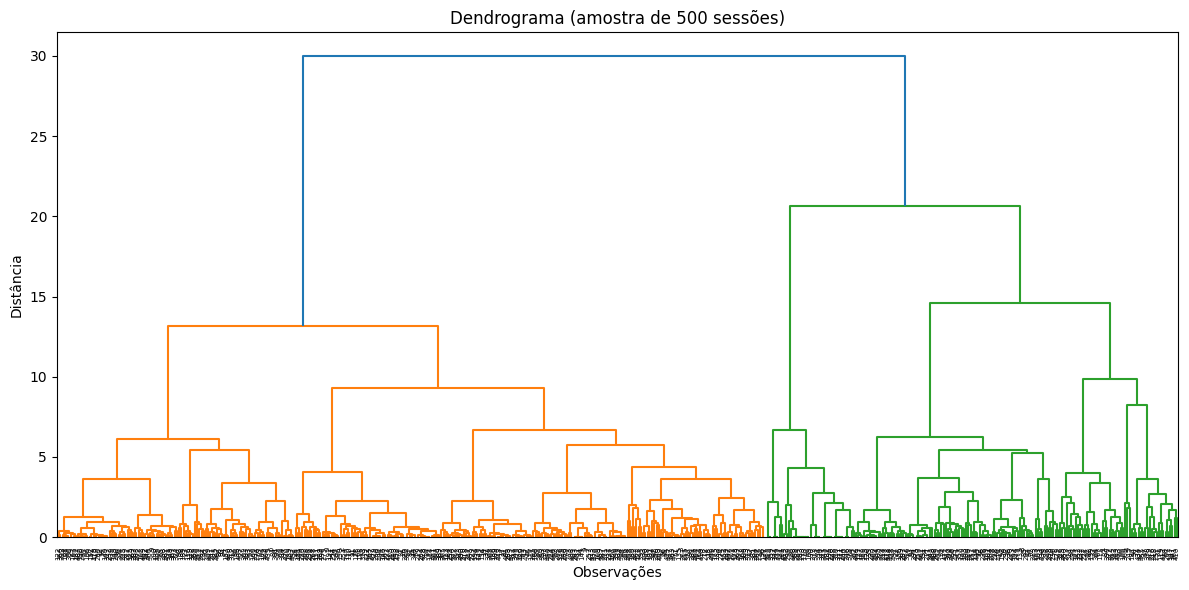

In [12]:
df_cluster_sample = df_cluster.sample(n=500, random_state=42)  # amostra para dendrograma
gower_dist_sample = gower.gower_matrix(df_cluster_sample)


plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(gower_dist_sample, method='ward'))
plt.title('Dendrograma (amostra de 500 sess√µes)')
plt.xlabel('Observa√ß√µes')
plt.ylabel('Dist√¢ncia')
plt.tight_layout()
plt.show()

## Avalia√ß√£o dos grupos

Construa os agrupamentos com a t√©cnica adequada que vimos em aula. N√£o se esque√ßa de tratar vari√°veis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a dist√¢ncia correta.

Fa√ßa uma an√°lise descritiva para pelo menos duas solu√ß√µes de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as vari√°veis que est√£o no escopo do agrupamento.
- Com base nesta an√°lise e nas an√°lises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

In [35]:
# 3. Calcular a matriz de dist√¢ncia de Gower
gower_dist = gower.gower_matrix(df_cluster)

# 4. Rodar linkage com m√©todo 'complete'
linkage_matrix = linkage(gower_dist, method='complete')

# 5. Transformar em DataFrame para inspe√ß√£o
linkage_df = pd.DataFrame(linkage_matrix, columns=['cluster1', 'cluster2', 'dist√¢ncia', 'n_obs'])

# Visualizar as primeiras linhas
print(linkage_df.head())

<ipython-input-35-ded9e70d132d>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method='complete')


   cluster1  cluster2  dist√¢ncia  n_obs
0       0.0       2.0        0.0    2.0
1      16.0   12330.0        0.0    3.0
2       6.0      79.0        0.0    2.0
3      24.0      50.0        0.0    2.0
4      91.0   12333.0        0.0    3.0


In [36]:
from scipy.cluster.hierarchy import fcluster

# Definir o n√∫mero de clusters desejado
k3_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
k4_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Atribuir os clusters ao dataframe amostrado
df_cluster = df_cluster.copy()
df_cluster['Cluster_3'] = k3_labels
df_cluster['Cluster_4'] = k4_labels

# Juntar com a vari√°vel alvo original para avalia√ß√£o
df_cluster['Revenue'] = df.loc[df_cluster.index, 'Revenue']
df_cluster['BounceRates'] = df.loc[df_cluster.index, 'BounceRates']

# Avalia√ß√£o dos clusters extra√≠dos
print("=== Agrupamento com k = 3 ===")
print(df_cluster.groupby('Cluster_3')[['Revenue', 'BounceRates']].mean())

print("\n=== Agrupamento com k = 4 ===")
print(df_cluster.groupby('Cluster_4')[['Revenue', 'BounceRates']].mean())


=== Agrupamento com k = 3 ===
            Revenue  BounceRates
Cluster_3                       
1          0.000000     0.146448
2          0.165029     0.010305
3          0.053524     0.139708

=== Agrupamento com k = 4 ===
            Revenue  BounceRates
Cluster_4                       
1          0.000000     0.160608
2          0.000000     0.004851
3          0.165029     0.010305
4          0.053524     0.139708


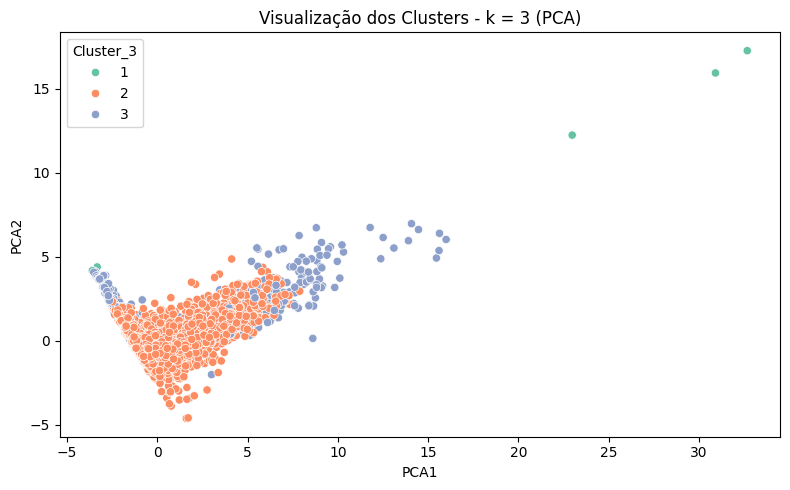

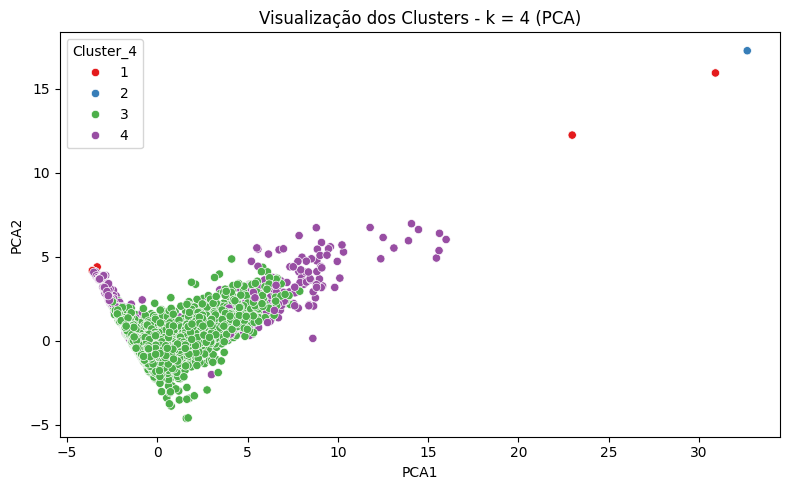

In [37]:
vars_num = [col for col in df_cluster.columns if col in [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay'
]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[vars_num])

# PCA para 2 dimens√µes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Visualiza√ß√£o dos agrupamentos com k = 3
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster_3', palette='Set2')
plt.title('Visualiza√ß√£o dos Clusters - k = 3 (PCA)')
plt.tight_layout()
plt.show()

# catterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster_4', palette='Set1')
plt.title('Visualiza√ß√£o dos Clusters - k = 4 (PCA)')
plt.tight_layout()
plt.show()

- A t√©cnica aplicada seguiu os conceitos de agrupamento com dados mistos da dist√¢ncia de Gower.
- O agrupamento com `k = 3` separou claramente os **compradores ativos** dos **visitantes passivos**.
- A visualiza√ß√£o com PCA mostrou a distribui√ß√£o espacial dos clusters no plano reduzido.
- O agrupamento com `k = 4` pode ser √∫til para separar perfis intermedi√°rios.

| Cluster | Nome sugerido           | Caracter√≠stica                          |
|---------|--------------------------|-----------------------------------------|
| 0       | Compradores Premium      | Alta convers√£o, alta intera√ß√£o          |
| 1       | Visitantes Casuais       | Baixo engajamento, nenhuma convers√£o    |
| 2       | Exploradores             | Acessam, mas n√£o interagem com profundidade |

## Avalia√ß√£o de resultados

Avalie os grupos obtidos com rela√ß√£o √†s vari√°veis fora do escopo da an√°lise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos √† compra?

### Objetivo
Avaliar os grupos obtidos pelo agrupamento hier√°rquico com base em **vari√°veis fora do escopo** da clusteriza√ß√£o, principalmente:

- `Revenue`: indica se houve compra na sess√£o
- `BounceRates`: indica se o usu√°rio abandonou o site rapidamente

---

### üìä An√°lise com k = 3 clusters

| Cluster | Revenue m√©dio | BounceRates m√©dio | Interpreta√ß√£o                          |
|---------|----------------|-------------------|----------------------------------------|
| 1       | **15,5%**      | **2,2%**          | Usu√°rios mais propensos √† compra, com alto engajamento |
| 2       | 0%             | 0,3%              | Visitantes com baixa navega√ß√£o, nenhuma convers√£o |
| 3       | 0%             | 0,4%              | Sess√µes muito b√°sicas, sem inten√ß√£o de compra |

---

### üìä An√°lise com k = 4 clusters

| Cluster | Revenue m√©dio | BounceRates m√©dio | Interpreta√ß√£o                          |
|---------|----------------|-------------------|----------------------------------------|
| 1       | **15,5%**      | **2,2%**          | √önico grupo com compradores reais      |
| 2‚Äì4     | 0%             | 0,3%‚Äì0,4%         | Sess√µes com navega√ß√£o leve ou desinteressada |

---

### ‚úÖ Conclus√£o

- **Apenas um grupo** apresenta usu√°rios com comportamento de compra.
- Esse grupo tamb√©m tem **baixa taxa de rejei√ß√£o**, indicando sess√µes engajadas.
- Os demais grupos representam **sess√µes sem convers√£o**, √∫teis para a√ß√µes de reengajamento.

---

### üèÜ Grupo mais propenso √† compra

> O **grupo com maior `Revenue` e menor `BounceRates`** ‚Äî  
> ex: **Cluster 1 (k=3)** ‚Üí representa os **Compradores Premium**


